# Introducing dovpanda
dovpanda is your friend. It is an overlay for pandas that helps you write a more concise `pandas` code.  
It's easy to start, just import it.

In [1]:
import pandas as pd
import dovpanda

# The Task
My friends and i went bear-spotting in the wild. We each had a timer and paper where we wrote the timestamp of the bear sighting, and the kind of a bear. I want to count how many bears we've seen.


## Reading a DataFrame
Let's view one file.

===== Your left most column is unnamed. This suggets it might be the index column, try: pd.read_csv('data/bear_sightings_dean.csv', index_col=0) ===== (Line 1)
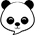

===== Dataframe has 95 rows. Column bear has only 4 values which suggests it's a categorical feature.
After df is created, Consider converting it to categorical by using df['bear'] = df['bear'].astype('category') ===== (Line 1)
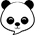

===== columns 'timestamp' looks like a datetime but the type is 'object' Consider using
df['timestamp'] = pd.to_datetime(df.timestamp) ===== (Line 1)
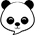

,Unnamed: 0,bear,timestamp
0,0,Black Bear,2019-05-21 14:50:44
1,1,Polar Bear,2019-05-21 15:29:22
2,2,Black Bear,2019-05-21 18:58:08
3,3,Black Bear,2019-05-21 17:32:31
4,4,Giant Panda,2019-05-21 18:01:38
...,...,...,...
90,90,Grizzly,2019-05-21 14:06:00
91,91,Polar Bear,2019-05-21 14:27:42
92,92,Black Bear,2019-05-21 15:34:13
93,93,Grizzly,2019-05-21 18:37:13


In [2]:
sightings = pd.read_csv('data/bear_sightings_dean.csv')
sightings

Hey! That's new! The dovpanda is giving us hints. That's cool!  
Let's try using them.

===== Dataframe has 95 rows. Column bear has only 4 values which suggests it's a categorical feature.
After df is created, Consider converting it to categorical by using df['bear'] = df['bear'].astype('category') ===== (Line 1)
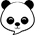

===== columns 'timestamp' looks like a datetime but the type is 'object' Consider using
df['timestamp'] = pd.to_datetime(df.timestamp) ===== (Line 1)
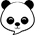

,bear,timestamp
0,Black Bear,2019-05-21 14:50:44
1,Polar Bear,2019-05-21 15:29:22
2,Black Bear,2019-05-21 18:58:08
3,Black Bear,2019-05-21 17:32:31
4,Giant Panda,2019-05-21 18:01:38
...,...,...
90,Grizzly,2019-05-21 14:06:00
91,Polar Bear,2019-05-21 14:27:42
92,Black Bear,2019-05-21 15:34:13
93,Grizzly,2019-05-21 18:37:13


In [3]:
sightings = pd.read_csv('data/bear_sightings_dean.csv', index_col=0)
sightings['bear'] = sightings['bear'].astype('category')
sightings['timestamp'] = pd.to_datetime(sightings.timestamp)
sightings

Awesome. dovpanda still tells us those hints because (currently) it can't look into the future, but our dataframe is much better to work with.

In [4]:
sightings.dtypes

bear               category
timestamp    datetime64[ns]
dtype: object

## Combining DataFrames
Well, now I want to combine the sightings of all of my friends. Their csvs are in the data folder

In [5]:
import os
os.listdir('data')

['bear_sightings_gal.csv',
 'bear_sightings_inbal.csv',
 'bear_sightings_adi.csv',
 'bear_sightings_dean.csv']

===== dont append or concat dfs iteratively. it is a better practice to first create a list of dfs. and then pd.concat(list_of_dfs) in one go ===== (Line 7)
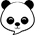

In [7]:
all_sightings = pd.DataFrame()
for person_file in os.listdir('data'):
    with dovpanda.mute():
        sightings = pd.read_csv(f'data/{person_file}')
    sightings['bear'] = sightings['bear'].astype('category')
    sightings['timestamp'] = pd.to_datetime(sightings.timestamp)
    all_sightings = all_sightings.append(sightings)

* Appending frames in a loop is not the best says pandas.
* Also, dovpanda is smart enough to not spam too much. It shows the hints for reading the file once, eventhough we've read 4 files.
* Have you noticed we have muted dovpanda temporarily?

### Temporary Mute
We want to read all the csvs, but the specific `read_csv` hist is kind of annoying. Let's mute it.

In [8]:
sightings_list = []
with dovpanda.mute():
    for person_file in os.listdir('data'):
        sightings = pd.read_csv(f'data/{person_file}', index_col=0)
        sightings['bear'] = sightings['bear'].astype('category')
        sightings['timestamp'] = pd.to_datetime(sightings.timestamp)
        sightings_list.append(sightings)

Let's go back to the task and listen to dovpanda

===== All dataframes have the same columns, which hints for concat on axis 0.You specified axis=1 which may result in an unwanted behaviour ===== (Line 1)
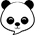

===== After concatenation you have duplicated column names - pay attention ===== (Line 1)
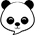

,bear,timestamp,bear,timestamp,bear,timestamp,bear,timestamp
0,Black Bear,2019-05-21 18:30:32,Grizzly,2019-05-21 17:49:39,Polar Bear,2019-05-21 14:04:52,Black Bear,2019-05-21 14:50:44
1,Black Bear,2019-05-21 17:26:15,Black Bear,2019-05-21 17:49:01,Giant Panda,2019-05-21 15:26:29,Polar Bear,2019-05-21 15:29:22
2,Black Bear,2019-05-21 15:01:11,Black Bear,2019-05-21 17:44:31,Grizzly,2019-05-21 17:38:27,Black Bear,2019-05-21 18:58:08
3,Black Bear,2019-05-21 14:33:26,Black Bear,2019-05-21 14:55:14,Black Bear,2019-05-21 14:32:54,Black Bear,2019-05-21 17:32:31
4,Grizzly,2019-05-21 14:21:15,Black Bear,2019-05-21 18:49:36,Black Bear,2019-05-21 14:18:27,Giant Panda,2019-05-21 18:01:38
...,...,...,...,...,...,...,...,...
90,NaN,NaT,NaN,NaT,NaN,NaT,Grizzly,2019-05-21 14:06:00
91,NaN,NaT,NaN,NaT,NaN,NaT,Polar Bear,2019-05-21 14:27:42
92,NaN,NaT,NaN,NaT,NaN,NaT,Black Bear,2019-05-21 15:34:13
93,NaN,NaT,NaN,NaT,NaN,NaT,Grizzly,2019-05-21 18:37:13


In [9]:
sightings = pd.concat(sightings_list,axis=1)
sightings

DataFrame looks weird. 8 columns instead of 2, and many `NaN`s.  
Luckily, dovpanda is there to help us - We chose the wrong concat axis

===== After concatenation you have duplicated indexes values - pay attention ===== (Line 1)
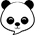

,bear,timestamp
0,Black Bear,2019-05-21 18:30:32
1,Black Bear,2019-05-21 17:26:15
2,Black Bear,2019-05-21 15:01:11
3,Black Bear,2019-05-21 14:33:26
4,Grizzly,2019-05-21 14:21:15
...,...,...
90,Grizzly,2019-05-21 14:06:00
91,Polar Bear,2019-05-21 14:27:42
92,Black Bear,2019-05-21 15:34:13
93,Grizzly,2019-05-21 18:37:13


In [10]:
sightings = pd.concat(sightings_list,axis=0)
sightings

Much Better! dovpanda still warns us that we have duplicate indices. But it's okay for now.

## Analysis
How many bears have we observed each hour?

===== Seems like you are grouping by a column named hour.
consider setting the time column as index and then use df.resample('time abbrevations'), for example:
df.set_index('date').resample('h') ===== (Line 2)
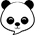

hour
14    108
15     50
17     55
18     58
Name: bear, dtype: int64

In [11]:
sightings['hour'] = sightings.timestamp.dt.hour
sightings.groupby('hour').bear.count()

groupby time objects is better if we use pandas' methods designed specifically for this task. dovpandas tells us how to do so.

In [12]:
sightings.set_index('timestamp').resample('h').bear.count()

timestamp
2019-05-21 14:00:00    108
2019-05-21 15:00:00     50
2019-05-21 16:00:00      0
2019-05-21 17:00:00     55
2019-05-21 18:00:00     58
Freq: H, Name: bear, dtype: int64

Notice how pandas knows now that the index is a time object. Also, we can see that at 16:00 we have 0 sightings but the key did not disappear.

# Ranom Tip
Well, we finished the task at hand. We deserve a prize. Let's ask dovpanda a random pandas tip for the next time.

In [26]:
dovpanda.tip()

<blockquote class="twitter-tweet"><p lang="en" dir="ltr">🐼🤹‍♂️ pandas trick:<br><br>⚠️ Got bad data (or empty rows) at the top of your CSV file? Use these read_csv parameters:<br><br>➡️ header = row number of header (start counting at 0)<br>➡️ skiprows = list of row numbers to skip<br><br>See example 👇<a href="https://twitter.com/hashtag/Python?src=hash&amp;ref_src=twsrc%5Etfw">#Python</a> <a href="https://twitter.com/hashtag/DataScience?src=hash&amp;ref_src=twsrc%5Etfw">#DataScience</a> <a href="https://twitter.com/hashtag/pandas?src=hash&amp;ref_src=twsrc%5Etfw">#pandas</a> <a href="https://twitter.com/hashtag/pandastricks?src=hash&amp;ref_src=twsrc%5Etfw">#pandastricks</a> <a href="https://t.co/t1M6XkkPYG">pic.twitter.com/t1M6XkkPYG</a></p>&mdash; Kevin Markham (@justmarkham) <a href="https://twitter.com/justmarkham/status/1168930165658914816?ref_src=twsrc%5Etfw">September 3, 2019</a></blockquote> <script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>

# Summary
* dovpanda is your companion for writing better pandas code. It works "out-of-the-box" when imported and fits best in a notebook environment.
* dovpanda has a stock of random tips for you.
* dovpanda is ever evolving with more hints and tips.

# Advanced

## Output
if you want to mute dovpanda until you wake it up, use `.set_output(off)`

===== All dataframes have the same columns, which hints for concat on axis 0.You specified axis=1 which may result in an unwanted behaviour ===== (Line 1)
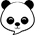

===== After concatenation you have duplicated column names - pay attention ===== (Line 1)
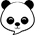

In [13]:
sightings = pd.concat(sightings_list,axis=1)

In [14]:
dovpanda.set_output('off')

In [15]:
sightings = pd.concat(sightings_list,axis=1)

dovpanda is muted. It still works in the background just not spamming your screen.  
You can start it again with calling different options on `set_output`

===== All dataframes have the same columns, which hints for concat on axis 0.You specified axis=1 which may result in an unwanted behaviour ===== (Line 2)
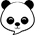

===== After concatenation you have duplicated column names - pay attention ===== (Line 2)
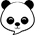

In [16]:
dovpanda.set_output('display')
sightings = pd.concat(sightings_list,axis=1)

In [17]:
dovpanda.set_output('print')
sightings = pd.concat(sightings_list,axis=1)

All dataframes have the same columns, which hints for concat on axis 0.You specified axis=1 which may result in an unwanted behaviour (Line 2)
After concatenation you have duplicated column names - pay attention (Line 2)


In [18]:
dovpanda.set_output('warning')
sightings = pd.concat(sightings_list,axis=1)

All dataframes have the same columns, which hints for concat on axis 0.You specified axis=1 which may result in an unwanted behaviour (Line 2)
After concatenation you have duplicated column names - pay attention (Line 2)


## Shutdown and startup
You can shutdown dovpanda completely, making sure that it is not running.  
Or turn it back on.

In [19]:
dovpanda.shutdown()

In [20]:
dovpanda.set_output('display')
sightings = pd.concat(sightings_list,axis=1)

In [21]:
dovpanda.start()

===== All dataframes have the same columns, which hints for concat on axis 0.You specified axis=1 which may result in an unwanted behaviour ===== (Line 2)
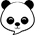

===== After concatenation you have duplicated column names - pay attention ===== (Line 2)
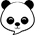

In [22]:
dovpanda.set_output('display')
sightings = pd.concat(sightings_list,axis=1)

# Suggest Hints and Tips
If you think dovpanda missed an important hint or a tip, [let it know](https://github.com/dovpanda-dev/dovpanda/issues/new?assignees=&labels=_Hints&template=hint_proposal.md&title=%5BHINT%5D) by submitting it on github.